# ACL2 for Trustworthy Vibe Coding

## Bridging Stochastic AI and Formal Verification

<table>
<tr>
<td width="60%" valign="top">

**Jim White** • 2026

[Verified Agent](https://github.com/wiki3-ai/verified-agent)  
[https://github.com/wiki3-ai/verified-agent](https://github.com/wiki3-ai/verified-agent)

</td>
<td width="40%" align="center" valign="top">

![Verified Agent QR Code][verified_agent_qr_image]

</td>
</tr>
</table>


[verified_agent_qr_image]: <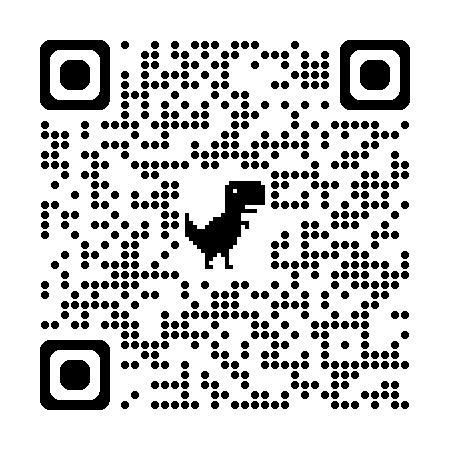>

---

[ACL2 Home](https://www.cs.utexas.edu/users/moore/acl2) https://www.cs.utexas.edu/users/moore/acl2

[GitHub](https://github.com/acl2/acl2) https://github.com/acl2/acl2

## The Problem: Unreliable AI Agents

Generative AI agents are fundamentally **stochastic**:
- Each token is sampled **probabilistically**—no guarantees
- Context instructions only **shift probability distribution**, can't provide assurances
- Fresh code means **minimal testing and vetting**
- Trust based on reading vast amounts of brand new code

Traditional trust model: Code thoroughly tested and vetted by many over time.

**Vibe coding model**: Brand new code, token-by-token synthesis, no formal assurances.

## A Solution: Theorem Driven Development

Replace ad hoc tests with theorems which are **correct for all inputs**:

- **Formal Methods** for Software Development
- Verify behavior through **computational proof**
- Favor composition of verified functions over synthesis
- Unit Tests still worthwhile for double checking
- Not a replacement for Integration Testing of course

### Verification Strategy: DRY Over Novelty

1. **Search First**: Look for proven solutions
2. **DRY**: Reuse well-tested, verified code
3. **Copy & Paste**: Integration, not generation
4. **Novelty is a Last Resort**

## Why ACL2 for AI Agents?

### The Problem ACL2 Solves

**LLMs (like humans &#x1F638;) are creative but unreliable.**

- Hallucinate, generate subtle bugs, produce non-deterministic behavior
- "Prompt engineering" doesn't create guarantees
- Testing can't cover all edge cases

### The ACL2 Approach

1. **Compose verified actions**, not synthesize novel code
2. **Proof provides infinite test coverage** (induction)
3. **Deterministic behavior despite LLM stochasticity**
4. **High-assurance AI for critical applications**

### When This Matters
- Medical diagnosis and treatment planning
- Financial decisions and risk assessment
- Autonomous vehicles and control systems
- Security-critical systems
- **Any system where mistakes are expensive**

## Infamous Failure: The Pentium FDIV Bug (1994)

### The Story

Intel's Pentium processor had a **floating-point division error**:
- Missing values in division lookup table (**5 cells out of 2,048**)
- **Cost Intel $475 million (about $1.3B 2025) in recalls**
- Discovered by users running spreadsheets

### AMD's Response: ACL2 verification of K5 FDIV (1995)

**First major industrial ACL2 verification**:
- Moore & Kaufmann with AMD's Tom Lynch
- **2-month project, verified BEFORE fabrication**
- Formalized IEEE 754 floating-point standard in ACL2
- Prevented a Pentium-style bug in AMD K5

---

**References:**
- [Pentium FDIV Bug (Wikipedia)](https://en.wikipedia.org/wiki/Pentium_FDIV_bug)
- [Peter-Michael Seidel, "Formal Verification of an Iterative Low-Power x86 Floating-Point Multiplier with Redundant Feedback" (2011)](https://cgi.cse.unsw.edu.au/~eptcs/paper.cgi?ACL22011.6.pdf)
- [Hunt et al. "Industrial hardware and software verification with ACL2" (2017)](https://royalsocietypublishing.org/doi/10.1098/rsta.2015.0399)

## What is ACL2?

**A Computational Logic for Applicative Common Lisp**

The **functional** aka **applicative** (as in `apply` of the **lambda calculus**)  subset of CL functions.  



ACL2 is a **programming language + industrial-strength theorem prover**:
- Code can be **executed and mathematically proven correct**
- [Church-Turing complete](https://en.wikipedia.org/wiki/Church%E2%80%93Turing_thesis): computation = mathematical proof
- Used in industry for hardware and software verification

### Key Insight

In ACL2, the distinction between **computation** and **proof** disappears.

---

[ACL2 Manual](https://www.cs.utexas.edu/~moore/acl2/v8-6/combined-manual/) https://www.cs.utexas.edu/~moore/acl2/v8-6/combined-manual/

[About ACL2](https://www.cs.utexas.edu/users/moore/acl2/) https://www.cs.utexas.edu/users/moore/acl2/

## Code is Data: S-Expressions

ACL2 uses **S-expressions** (Symbolic Expressions) for both code and data:

```lisp
(apply fn args)        ; Apply function to arguments
(eval sexpr)           ; Evaluate symbolic expression
```

### Why This Matters
- **Code and data have identical syntax**
- Enables **meta-programming** and verified code generation
- Self-modifying and self-verifying programs

### Background Reading

[S-expressions on Wikipedia](https://en.wikipedia.org/wiki/S-expression) https://en.wikipedia.org/wiki/S-expression

[McCarthy's Recursive Functions of Symbolic Expressions](https://www-formal.stanford.edu/jmc/recursive/recursive.html) https://www-formal.stanford.edu/jmc/recursive/recursive.html

See also: [Readable Code Style](https://readable.sourceforge.io/) for modern S-expression syntax 

## Verified Quine (Self-Reproducing) Expression:

https://github.com/jimwhite/acl2-jupyter/blob/main/examples/notebooks/quine.ipynb

In [1]:
(defconst *quine-exp* 
  ((LAMBDA (X)
   (CONS X
         (CONS (CONS 'QUOTE (CONS X NIL)) NIL)))
 '(LAMBDA (X)
    (CONS X
          (CONS (CONS 'QUOTE (CONS X NIL)) NIL)))))


Summary
Form:  ( DEFCONST *QUINE-EXP* ...)
Rules: NIL
Time:  0.00 seconds (prove: 0.00, print: 0.00, other: 0.00)
 *QUINE-EXP*


In [2]:
*QUINE-EXP*

((LAMBDA (X)
   (CONS X
         (CONS (CONS 'QUOTE (CONS X NIL)) NIL)))
 '(LAMBDA (X)
    (CONS X
          (CONS (CONS 'QUOTE (CONS X NIL)) NIL))))


In [3]:
(include-book "projects/apply/top" :dir :system)


Summary
Form:  ( INCLUDE-BOOK "projects/apply/top" ...)
Rules: NIL
Time:  0.79 seconds (prove: 0.00, print: 0.00, other: 0.79)
 "/home/acl2/books/projects/apply/top.lisp"


In [4]:
(equal (ev$ *quine-exp* '()) *quine-exp*)

T


In [5]:
(thm (equal (ev$ *quine-exp* '()) *quine-exp*))


Q.E.D.

Summary
Form:  ( THM ...)
Rules: ((:EXECUTABLE-COUNTERPART EQUAL)
        (:EXECUTABLE-COUNTERPART EV$))
Time:  0.00 seconds (prove: 0.00, print: 0.00, other: 0.00)
Prover steps counted:  5

Proof succeeded.


In [6]:
(defun bounded-recursive-eval (exp n)
  (declare (xargs :guard (natp n)
                  :measure (nfix n)))
  (if (zp n) exp (bounded-recursive-eval (ev$ exp '()) (1- n))))


For the admission of BOUNDED-RECURSIVE-EVAL we will use the relation
O< (which is known to be well-founded on the domain recognized by O-P)
and the measure (NFIX N).  The non-trivial part of the measure conjecture
is

Goal
(AND (O-P (NFIX N))
     (IMPLIES (NOT (ZP N))
              (O< (NFIX (+ -1 N)) (NFIX N)))).
Subgoal 2
Subgoal 1
Subgoal 1'

Q.E.D.

That completes the proof of the measure theorem for BOUNDED-RECURSIVE-EVAL.
Thus, we admit this function under the principle of definition.  We
could deduce no constraints on the type of BOUNDED-RECURSIVE-EVAL.

Computing the guard conjecture for BOUNDED-RECURSIVE-EVAL....

The guard conjecture for BOUNDED-RECURSIVE-EVAL is trivial to prove,
given the :compound-recognizer rules NATP-COMPOUND-RECOGNIZER and 
ZP-COMPOUND-RECOGNIZER and primitive type reasoning.  BOUNDED-RECURSIVE-EVAL
is compliant with Common Lisp.

Summary
Form:  ( DEFUN BOUNDED-RECURSIVE-EVAL ...)
Rules: ((:COMPOUND-RECOGNIZER NATP-COMPOUND-RECOGNIZER)
        (:COMPO

In [7]:
(thm (equal (bounded-recursive-eval *quine-exp* N) *quine-exp* ))


*1 (the initial Goal, a key checkpoint) is pushed for proof by induction.

Perhaps we can prove *1 by induction.  One induction scheme is suggested
by this conjecture.  

We will induct according to a scheme suggested by 
(BOUNDED-RECURSIVE-EVAL '((LAMBDA (X)
                            (CONS X
                                  (CONS (CONS 'QUOTE (CONS X NIL)) NIL)))
                          '(LAMBDA (X)
                             (CONS X
                                   (CONS (CONS 'QUOTE (CONS X NIL)) NIL))))
                        N).

This suggestion was produced using the :induction rule BOUNDED-RECURSIVE-EVAL.
If we let (:P N) denote *1 above then the induction scheme we'll use
is
(AND (IMPLIES (AND (NOT (ZP N)) (:P (+ -1 N)))
              (:P N))
     (IMPLIES (ZP N) (:P N))).
This induction is justified by the same argument used to admit 
BOUNDED-RECURSIVE-EVAL.  When applied to the goal at hand the above
induction scheme produces two nontautological subgoals.
Subgoal *

# Compiler Verification Revisited with ACL2

## Overview

Wolfgang Goerigk authored groundbreaking work on **formal compiler verification** using the ACL2 theorem prover, demonstrating that mechanical proofs of compiler correctness are practical and feasible.

### Chapter 15 - ACL2 Case Studies Book

**Publication:**
- *Computer-Aided Reasoning: ACL2 Case Studies*
- Kluwer Academic Publishers, June 2000
- Eds: Kaufmann, Manolios, Moore

### Key Insight: The Thompson Trojan

Illustrates Ken Thompson's Turing Award observation: a correct compiler's machine code can contain a Trojan Horse that:
- Passes almost every test
- Passes bootstrap tests (self-compiling correctly)
- Still generates malicious object code

### Contribution: Preservation of Partial Correctness

**Formalizes in ACL2:**
- Source language semantics (Lisp subset)
- Abstract stack machine semantics
- Mechanical proof that correct implementation **preserves partial correctness**

**Why Partial Correctness?**
- Practically motivated implementation correctness notion
- Allows arbitrary machine execution even if source program not totally correct
- More realistic for real-world compiler verification

**Materials:**
- Full ACL2 scripts in `workshops/1999/compiler/` directory
- Available in ACL2 books GitHub repository

## ACL2 Workshop 2000 Paper

### Proving Preservation of Partial Correctness with ACL2

**Title:** "Proving Preservation of Partial Correctness with ACL2: A Mechanical Compiler Source Level Correctness Proof"

**Publication:**
- ACL2 Workshop 2000 Proceedings
- Austin, Texas, October 30-31, 2000

**Available Resources:**
- PDF: https://www.cs.utexas.edu/~moore/acl2/workshop-2000/final/goerigk/paper.pdf
- PostScript version
- Presentation slides (PDF)

### Technical Approach

1. **Formalize source language:** Lisp subset semantics
2. **Define target machine:** Abstract stack machine
3. **Prove L-simulation:** Compiler preserves partial correctness via mechanical proof
4. **Practical validation:** Demonstrates ACL2 is suitable for real compiler verification

### Key Result

**Mechanical proof** that a compiler from Lisp subset to abstract stack machine preserves source-level correctness—a practically motivated and formally verified implementation correctness notion.

**Institution:** Institut für Informatik und Praktische Mathematik, Christian-Albrechts-Universität zu Kiel, Germany

---

## References

1. Goerigk, W. (2000). Compiler Verification Revisited. In *Computer-Aided Reasoning: ACL2 Case Studies* (Ch. 15). Kluwer Academic Publishers.

2. Goerigk, W. (2000). Proving Preservation of Partial Correctness with ACL2: A Mechanical Compiler Source Level Correctness Proof. *ACL2 Workshop 2000 Proceedings*.

3. Source Code: https://github.com/acl2/acl2/tree/master/books/workshops/1999/compiler


## Verifying the Specification (Spec) of an Implementation

### The Core Idea

Prove that a function **equals its specification**:

```lisp
(equal (my-function something) (specification something))  →  t
```

Then **assert as a theorem** equality for all argument values:

```acl2
(defthm correctness-of-my-function
  (equal (my-function X) (specification X)))
```

### What This Gives You
- **Executable proof**: Running the code proves correctness
- **Mechanical verification**: No human error in proof
- **Unlimited test coverage**: Proof covers all inputs

## Verifying the Specification (Spec) of an Implementation

### Specifications Don't Exist (Galois)
https://www.galois.com/articles/specifications-dont-exist

https://www.galois.com/articles/what-works-and-doesnt-selling-formal-methods

## Inductive Verification: Prove for All Cases

### Mathematical Induction

Prove a property holds for:
1. **Base case**: Initial conditions
2. **Inductive step**: If true for n, then true for n+1

### The Power
- **One proof covers infinite cases**
- No need for thousands of test cases
- **Correctness guaranteed**, not probabilistic
- Works for any input size or number of iterations

## Examples

### Mike Dodds (Galois) Claude Code ACL2 vibing experiment

- https://github.com/jimwhite/acl2-swf-experiments/blob/main/experiments/arithmetic/experiment-02-induction-basics.ipynb

### Ray Myers Theorem Provers *Are* Refactoring Tools

- Doing the Gilded Rose refactoring kata with the Kestrel Automated Program Transformations (https://www.kestrel.edu/research/apt/) accompanied by tutorial video
- https://github.com/jimwhite/acl2-swf-experiments/blob/main/experiments/refactoring/gilded-rose.ipynb






## ACL2 Industrial Applications

### Hardware Verification
- **Machine instruction specifications**: x86, JVM, PowerPC, MIPS
- **VLSI design**: RTL, VHDL, Verilog
- **AMD, Intel, Motorola** microprocessor verification

### Software & Tools
- **Milawa**: Verified theorem prover and compiler
- **Security protocols** and cryptographic algorithms
- **Operating system kernels**

### Impact
ACL2 has verified billions of dollars worth of hardware and mission-critical software.

## Developing with ACL2: Modern Tools

### Interactive Development

- **[ACL2-Jupyter](https://github.com/acl2-community-projects/acl2-jupyter)**: Docker devcontainer for interactive notebooks
- **ACL2 REPL**: Read-eval-print loop for exploration

### AI-Assisted Development

- **[ACL2 MCP](https://github.com/wiki3-ai/acl2-mcp)**: Model Context Protocol for AI agents
- **[Parinfer MCP](https://github.com/wiki3-ai/parinfer-mcp)**: Structured editing with parenthesis management
- **Claude Code + acl2-mcp**: AI-assisted verified code generation

### Example Flow
1. Ask Claude to generate ACL2 code
2. Claude uses acl2-mcp to test and verify in real-time
3. Get verified code, not just plausible code

---

[ACL2 Community](https://github.com/acl2/acl2) | [wiki3.ai Tools](https://github.com/wiki3-ai)

## SMTLink: Integrating Z3 Solver

### The Problem

Some proofs require heavy lifting in algebraic manipulation.

### The Solution: SMTLink

**Harness Z3 (SMT solver) power within ACL2**:
- **Offload polynomial and non-linear arithmetic** to Z3
- Z3 solves hard problems, ACL2 verifies the answer
- **Proven clause processor** ensures soundness—no unsound shortcuts
- **Dramatically reduce manual proof burden**

### What You Get
- Automated reasoning for complex domains
- Trustworthy integration (not a black box)
- Same guarantee as traditional ACL2 proof

### Try it yourself
https://github.com/jimwhite/acl2-swf-experiments/blob/main/experiments/smtlink/examples/inverter.ipynb

---

[SMTLink 2.0 Paper](https://arxiv.org/abs/1810.04317) https://arxiv.org/abs/1810.04317

[Extending ACL2 with SMT Solvers](https://www.cs.ubc.ca/~yanpeng/papers/ACL2'15.pdf) https://www.cs.ubc.ca/~yanpeng/papers/ACL2'15.pdf

## Transpiling Verified Models

Verified ACL2 code can be compiled to **production languages**:

### ATC: ACL2 → C
- **Proof-generating C code generator**
- Formal correctness guarantees survive compilation
- Use case: firmware, OS kernels, safety-critical systems

### ATJ: ACL2 → Java  
- **Shallow and deep embeddings** for Java
- Deploy verified algorithms in Java applications
- Use case: enterprise software, Android apps

### Key Insight
**Verification at development time** → **Optimized code at runtime**

---

[ATC (ACL2 to C)](https://www.kestrel.edu/research/atc/) | [ATJ Paper](https://arxiv.org/abs/2205.11708)

*Formal Verification of Arithmetic RTL: Translating Verilog to C++ to ACL2* https://cgi.cse.unsw.edu.au/~eptcs/paper.cgi?ACL22020.1



## Browser-Native Execution: JSCL + JupyterLite

### The Vision

Run verified code **directly in the browser**, no server needed.

### How It Works

1. **JSCL**: Lisp compiled to JavaScript
2. **JupyterLite**: Python/JavaScript Jupyter runtime in browser
3. **Result**: Execute verified ACL2 algorithms in browser

### Use Cases
- **Local-first AI agents** running entirely client-side
- **Decentralized verification** without server trust
- **Privacy-preserving computation**

---

[JSCL on GitHub](https://github.com/jscl-project/jscl) | [JupyterLite](https://jupyterlite.readthedocs.io/) | [wiki3.ai](https://wiki3.ai)

## Verified ReAct Agents: Reasoning + Acting

### The ReAct Pattern

**Reason** → **Act** → **Observe** → repeat until goal

### Applied to Verified Computation

1. **LLM Reason**: Generate next thought or action (stochastic, creative)
2. **Verified Act**: Execute formally verified step (deterministic, trustworthy)
3. **Loop**: Continue until goal achieved—**with guarantees**

### The Advantage

- **LLM handles flexibility** and natural language understanding
- **Verified code handles correctness** and safety guarantees
- **Best of both worlds**: Capable AND trustworthy

---

[*ReAct: Synergizing Reasoning and Acting in Language Models*](https://react-lm.github.io/) https://react-lm.github.io/ 

https://github.com/wiki3-ai/verified-agent

## Verified Agent Architecture

### Three-Layer Design

#### 1. Perception (Safely Parse Input)
- Validate and parse user input
- Extract structured information
- **Verified parser** ensures no injection attacks

#### 2. Reasoning (LLM Planning)
- Use Claude/GPT to generate next step
- Large context window for understanding
- Natural language flexibility

#### 3. Action (Execute Verified Code)
- Call formally verified functions
- Guaranteed correct execution
- Safe composition of proven steps

### The Loop
**Perception → LLM-guided Reasoning → Verified Execution → Loop**

## Theorem Driven Development Methodology

|  | **Objective: <br/>Ensure desired behavior** | **Objective: <br/>Prevent undesired behavior** |
|---|---|---|
| **Method: Compare** <br/>implementation &rightarrow; model spec| Verifies the modeled part of the implementation | Prove theorems that the undesired behavior can't happen in the modeled part of the implementation |
| **Method: Generate** <br/>formal spec &rightarrow; implementation  | Behavior as specified by construction | Prove theorems that the undesired behavior can't happen |


## Theorem Driven Development

### The Vision

**Formal Methods + Generative AI = Trustworthy Agents with Mathematical Guarantees**

### The Workflow

1. **Identify** the problem
2. **Specify** behavior formally (ACL2 code)
3. **Implement** the logic (ACL2 functions)
4. **Prove** correctness (defthm)
5. **Transpile** to production (ATC/ATJ/JSCL)
6. **Deploy** with confidence

### The Difference from Vibe Coding

| Vibe Coding | Theorem Driven |
|---|---|
| Generate → Hope → Test | Specify → Prove → Deploy |
| Stochastic | Deterministic |
| "Maybe works" | "Provably works" |

### Reality

Both approaches can coexist:
- **Use AI for creativity** (planning, design, discovery)
- **Use formal methods for correctness** (implementation, verification, safety)

## Resources & Next Steps

### Learn ACL2
- [ACL2 Home Page](https://www.cs.utexas.edu/users/moore/acl2)
- [ACL2 Manual](https://www.cs.utexas.edu/~moore/acl2/v8-6/combined-manual/)
- [GitHub Repository](https://github.com/acl2/acl2)

### Try It Out
- [ACL2-Jupyter](https://github.com/acl2-community-projects/acl2-jupyter) - Interactive notebooks
- [Verified Agent Code](https://github.com/wiki3-ai/verified-agent) - Reference implementation
- [wiki3.ai/wiki/lisp.html](https://wiki3.ai/wiki/lisp.html) - Live Lisp environment

### Read More
- [ReAct Pattern Paper](https://react-lm.github.io/) - Reasoning + Acting in LLMs
- [SMTLink 2.0](https://arxiv.org/abs/1810.04317) - Z3 integration
- [ATC: ACL2 to C](https://www.kestrel.edu/research/atc/) - Code generation

### Get Involved
- [wiki3.ai GitHub](https://github.com/wiki3-ai) - Verified agent tools and MCPs
- [ACL2 Community](https://www.cs.utexas.edu/users/moore/acl2/community.html) - Mailing lists and discussions

## Thank You!

### Questions?

**Jim White**

📧 [jim@wiki3.ai](mailto:jim@wiki3.ai)  
🐙 [github.com/wiki3-ai](https://github.com/wiki3-ai)  
🌐 [wiki3.ai](https://wiki3.ai)

---

**Slides & Code**: [github.com/wiki3-ai/verified-agent](https://github.com/wiki3-ai/verified-agent)